## Initializing the notebook
These first few cells must be run first every time you are starting this program for the first time. The first cell imports a bunch of useful functions, and sets up some pretty plots. The second cell starts up a GUI that establishes communications with the lab equipment, sets up the experiment, and runs it.

**Note** This notebook is running a Python kernel, which is a dedicated computer process that just runs this stuff. At any time, you can interrupt an operation by going up to the "Kernel" menu and clicking Interrupt, or you can completely stop it and restart it by choosing Restart.

If you want to switch to a different program that uses any of the lab equipment that this program also uses, you will need to first restart the kernel, thus releasing ownership of those devices (there are other ways to do this as well, but this is the easiest).

In [1]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.append('../')

# import pyscan as ps
# from qick import *
from rfsoc2 import *
import matplotlib.pyplot as plt
import numpy as np
from time import sleep
from datetime import date, datetime
from pathlib import Path
from spinecho_gui import *
if 'devices' not in globals():
    devices = ps.ItemAttribute()
    sig = ps.ItemAttribute()
    sweep = {}

soc = QickSoc()
soccfg = soc

plt.rc('lines', lw=2)
plotfont = {'family': 'serif', 'size': 16}
plt.rc('font', **plotfont)
plt.rc('mathtext', fontset='cm')

wait = 0.3

controls, parameters = spinecho_gui(sig, devices, sweep, soc)
# from IPython.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

/usr/local/share/pynq-venv/lib/python3.10/site-packages/pyvisa_py/tcpip.py:122: UserWarning: TCPIP::hislip resource discovery requires the zeroconf package to be installed... try 'pip install zeroconf'
  warnings.warn(


<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

In [2]:
controls

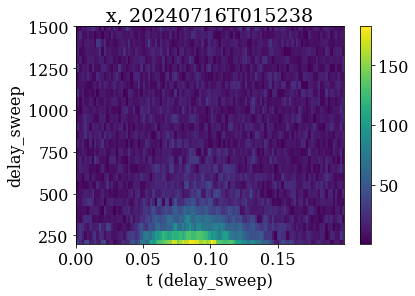

In [21]:
ps.live_plot2D(sweep['expt'], x_name='t', y_name=parameters['y_name'], data_name='x', transpose=1)

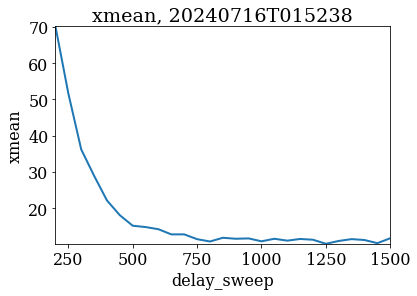

In [22]:
ps.live_plot1D(sweep['expt'], x_name=parameters['y_name'], data_name='xmean')

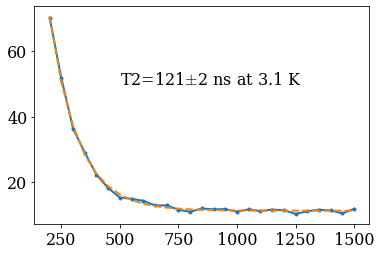

In [25]:
fit, err = ps.plot_exp_fit_norange(np.array([sweep['expt'][parameters['y_name']], sweep['expt'].xmean]),
                                   parameters['freq'])
temp = sweep['expt'].temp[0]
plt.text(500, 50, f'T2={fit[2]:.3g}'+r'$\pm$'+f'{err[2]:.1g} ns at {temp:.2g} K');

In [3]:
expt = ps.Sweep(sweep['runinfo'], devices, sweep['name'])
sweep['expt'] = expt

sweep['expt'].start_time = time()
sweep['expt'].start_thread()

In [10]:
from rfsoc2 import CPMGProgram

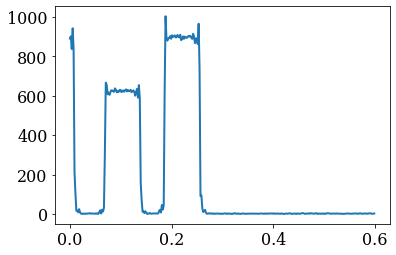

In [20]:
parameters['nutation_length'] = 50
parameters['pulses'] = 1
parameters['h_offset'] = parameters['nutation_length']/1000
prog = CPMGProgram(soccfg, parameters)
test = measure_phase(prog, soc)
plt.plot(test.time, test.x);